### Naive Bayes Classifier Task
### 문장에서 느껴지는 감정 예측
##### 다중 분류(Multiclass Classification)
- 비대면 심리 상담사로서 메세지를 전달한 환자에 대한 감정 데이터를 수집했다.
- 각 메세지 별로 감정이 표시되어 있다.
- 미래에 동일한 메세지를 보내는 환자에게 어떤 심리 치료가 적합할 수 있는지 알아보기 위한 모델을 구축한다.

In [1]:
import pandas as pd

In [2]:
# 데이터 세트 호출
feel_df = pd.read_csv('./datasets/feeling.csv')

In [3]:
feel_df

,message;feeling
0,im feeling quite sad and sorry for myself but ...
1,i feel like i am still looking at a blank canv...
2,i feel like a faithful servant;love
3,i am just feeling cranky and blue;anger
4,i can have for a treat or if i am feeling fest...
...,...
17995,i just had a very brief time in the beanbag an...
17996,i am now turning and i feel pathetic that i am...
17997,i feel strong and good overall;joy
17998,i feel like this was such a rude comment and i...


### Ⅰ. 데이터 탐색

#### 📊 데이터 정보 확인

In [4]:
# 데이터 정보 확인
feel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   message;feeling  18000 non-null  object
dtypes: object(1)
memory usage: 140.8+ KB


#### 📊 데이터 결측치 확인

In [5]:
# 데이터 결측치 확인
feel_df.isna().sum()

message;feeling    0
dtype: int64

#### 📊 데이터 중복 확인 및 제거

In [6]:
# 중복행 확인
feel_df.duplicated().sum()

1

In [7]:
# 중복행 삭제
feel_df.drop_duplicates(inplace=True)

In [8]:
# 중복행 재확인
feel_df.duplicated().sum()

0

### Ⅱ. 데이터 전처리

#### 📊 문자열 나누기

In [9]:
feel_co_df = feel_df.copy()

In [10]:
# ;를 기준으로 문자열 분리
feel_co_df[['message', 'feeling']] = feel_co_df['message;feeling'].str.split(';', expand=True)
# 나눠진 문자열 컬럼은 삭제
feel_co_df = feel_co_df.drop(labels='message;feeling', axis=1)
# 타겟명 변경
feel_co_df = feel_co_df.rename(columns={'feeling': 'target'})

In [11]:
feel_co_df

,message,target
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy
...,...,...
17995,i just had a very brief time in the beanbag an...,sadness
17996,i am now turning and i feel pathetic that i am...,sadness
17997,i feel strong and good overall,joy
17998,i feel like this was such a rude comment and i...,anger


In [12]:
# 타겟의 데이터 별 개수 확인
feel_co_df.target.value_counts()

# 불균형 데이터이지만, 실습이니 맞추지 않고 일단 진행...

target
joy         6065
sadness     5216
anger       2434
fear        2149
love        1482
surprise     653
Name: count, dtype: int64

#### 📊 문자열 형변환

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
feel_en_df = feel_co_df.copy()

In [15]:
# 인코더 매소드 담기
feel_encoder = LabelEncoder()

In [16]:
# 문자열 타겟을 숫자로 인코딩
targets = feel_encoder.fit_transform(feel_en_df.loc[:, 'target'])
# 인코딩 된 데이터로 교체
feel_en_df['target'] = targets

In [17]:
feel_en_df

,message,target
0,im feeling quite sad and sorry for myself but ...,4
1,i feel like i am still looking at a blank canv...,4
2,i feel like a faithful servant,3
3,i am just feeling cranky and blue,0
4,i can have for a treat or if i am feeling festive,2
...,...,...
17995,i just had a very brief time in the beanbag an...,4
17996,i am now turning and i feel pathetic that i am...,4
17997,i feel strong and good overall,2
17998,i feel like this was such a rude comment and i...,0


### Ⅲ. 데이터 세트 분리

#### 📊 데이터 세트 분리

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# 문제/정답 및 학습/테스트 데이터 세트로 분리
X_train, X_test, y_train, y_test = \
train_test_split(feel_en_df.message, feel_en_df.target, stratify=feel_en_df.target, test_size=0.2, random_state=124)

### Ⅳ. 데이터 학습

#### 📊 텍스트 전처리 및 분류

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [21]:
# 텍스트에서 토큰을 찾음 (빈도수 확인)
token = []
text = []

In [22]:
# 파이프 2개 연결하여 처리 (텍스트를 백터로 형변환 → 나이브 베이즈 분류기)
m_nb_pipe = Pipeline([('count_vectorizer', CountVectorizer()), ('multinomail_NB', MultinomialNB())])

#### 📊 데이터 훈련

In [23]:
# 문제/정답 학습 데이터로 훈련하기
m_nb_pipe.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('multinomail_NB', MultinomialNB())])

### Ⅴ. 데이터 예측

#### 📊 데이터 예측

In [24]:
# 문제 테스트 데이터로 예측하기
prediction = m_nb_pipe.predict(X_test)

### Ⅵ. 데이터 평가

#### 📊 데이터 평가 (정확도 확인)

In [25]:
# 문제, 정답 테스트 데이터로 평가하기
m_nb_pipe.score(X_test, y_test)

0.7519444444444444

In [26]:
# 확인
# 특정 데이터의 예측값 확인하기
m_nb_pipe.predict([feel_en_df.iloc[5450].message])

array([1])

In [27]:
# 학습된 모델의 클래스 확인 (원래 값의 배열 제공)
feel_encoder.classes_[m_nb_pipe.predict(X_test)]

array(['sadness', 'joy', 'sadness', ..., 'sadness', 'joy', 'sadness'],
      dtype=object)

### Ⅶ. 오차행렬

#### 📊 오차행렬

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 정밀도, 재현율, F1 score는 다중 분류에서 각각의 확률값의 평균을 구해서 나타내야 한다.
# 이 때, macro 방식과, micro 방식이 대표적이다.
# macro: 평균을 낸 뒤, 그 평균의 다시 평균을 구하는 방식(샘플 수는 신경쓰지 않는다). = 비중 맞추기
# micro: 샘플 수를 전체 합하고 전체 개수도 전체 합해서 나눠주는 방식(샘플 수를 신경쓴다). = 비중 안 맞춰도 됨
# 타겟 데이터의 비중이 많이 차이난다면, micro방식을 사용하는 것이 바람직하다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction, average='micro')
#     재현율
    recall = recall_score(y_test , prediction, average='micro')
#     F1 score
    f1 = f1_score(y_test, prediction, average='micro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[ 287    5   74    1  120    0]
 [  18  224   81    1  106    0]
 [   4    2 1146    6   55    0]
 [   5    3  168   72   48    0]
 [   7    3   62    1  970    0]
 [   2   16   68    0   37    8]]
정확도: 0.7519, 정밀도: 0.7519, 재현율: 0.7519, F1: 0.7519
################################################################################


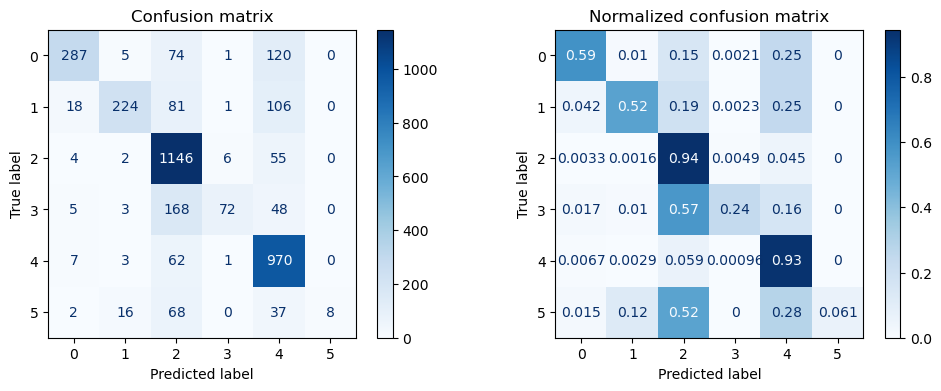

In [29]:
get_evaluation(y_test, prediction, m_nb_pipe, X_test)

#### 정리
위의 오차 행렬을 보면, 3과 5에 대한 예측률이 좋지 않다. 이는 타겟 데이터의 불균형 문제로 판단된다.  
언더 샘플링을 통해 타겟 데이터의 비중을 맞춰주면 T<sub>n</sub>이 높아질 것으로 보인다.
* 언더 샘플링은 10% 미만에서 사용하기...

### Ⅷ. 언더 샘플링

#### 📊 데이터 호출

In [30]:
# 데이터 세트 호출
f_df = pd.read_csv('./datasets/feeling.csv', sep=";")
f_df

,message,feeling
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy
...,...,...
17995,i just had a very brief time in the beanbag an...,sadness
17996,i am now turning and i feel pathetic that i am...,sadness
17997,i feel strong and good overall,joy
17998,i feel like this was such a rude comment and i...,anger


#### 📊 데이터 탐색

In [31]:
f_df.feeling.value_counts()

feeling
joy         6066
sadness     5216
anger       2434
fear        2149
love        1482
surprise     653
Name: count, dtype: int64

#### 📊 데이터 전처리

In [32]:
# 중복행 제거
f_df.drop_duplicates(inplace=True)

In [33]:
# 중복 확인
f_df.duplicated().sum()

0

In [34]:
from sklearn.preprocessing import LabelEncoder

# 문자열 정수로 형변환
f_encoder = LabelEncoder()
targets = f_encoder.fit_transform(f_df.feeling)
f_df['target'] = targets
f_df = f_df.drop(labels=['feeling'], axis=1)
f_df

,message,target
0,im feeling quite sad and sorry for myself but ...,4
1,i feel like i am still looking at a blank canv...,4
2,i feel like a faithful servant,3
3,i am just feeling cranky and blue,0
4,i can have for a treat or if i am feeling festive,2
...,...,...
17995,i just had a very brief time in the beanbag an...,4
17996,i am now turning and i feel pathetic that i am...,4
17997,i feel strong and good overall,2
17998,i feel like this was such a rude comment and i...,0


#### 📊 언더 샘플링

In [35]:
# 각 피처의 샘플 개수 맞춰주기 
# 'anger' 'fear' 'joy' 'love' 'sadness' 'surprise'
anger = f_df[f_df.target == 0].sample(653, random_state=124)
fear = f_df[f_df.target == 1].sample(653, random_state=124)
joy = f_df[f_df.target == 2].sample(653, random_state=124)
love = f_df[f_df.target == 3].sample(653, random_state=124)
sadness = f_df[f_df.target == 4].sample(653, random_state=124)
surprise = f_df[f_df.target == 5]

under_f_df = pd.concat([anger, fear, joy, love, sadness, surprise]).reset_index(drop=True)

In [36]:
under_f_df.target.value_counts()

target
0    653
1    653
2    653
3    653
4    653
5    653
Name: count, dtype: int64

#### 📊 데이터 세트 분리

In [37]:
from sklearn.model_selection import train_test_split

# 문제/정답, 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(under_f_df.message, under_f_df.target, stratify=under_f_df.target, test_size=0.2, random_state=124)

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# 파이프 2개 연결하여 처리 (텍스트를 백터로 형변환 → 나이브 베이즈 분류기)
m_nb_pipe = Pipeline([('count_vectorizer', CountVectorizer()), 
                      ('multinomial_NB', MultinomialNB())])

#### 📊 데이터 학습

In [39]:
# 데이터 학습
m_nb_pipe.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('multinomial_NB', MultinomialNB())])

In [40]:
print(y_test)
print(m_nb_pipe.predict(X_test))

3589    5
655     1
1814    2
4       0
3813    5
       ..
393     0
1957    2
1292    1
2054    3
1015    1
Name: target, Length: 784, dtype: int32
[5 5 2 0 5 5 4 1 3 1 2 2 2 3 1 1 0 1 4 0 5 0 3 5 4 4 2 3 1 5 2 4 2 5 2 3 3
 1 5 1 3 2 0 4 3 4 3 5 2 3 4 5 4 3 0 5 1 4 1 4 3 4 3 3 5 3 4 2 3 4 2 2 0 5
 2 0 0 1 1 4 4 2 2 4 1 3 0 1 5 5 0 5 3 3 2 2 0 1 2 5 2 3 1 1 3 4 4 3 4 3 4
 0 5 1 2 0 0 5 3 5 2 2 5 2 0 2 3 3 2 2 3 0 1 3 4 5 0 0 0 0 0 0 2 1 1 2 0 0
 2 4 2 2 5 2 3 4 1 1 3 1 5 4 0 1 5 2 2 3 1 0 3 2 1 1 3 1 1 2 4 1 1 1 5 5 3
 1 4 5 4 3 5 3 3 3 1 5 5 1 2 5 5 2 3 5 3 0 1 2 2 3 5 3 2 4 2 3 3 0 1 4 5 1
 4 5 3 2 0 3 0 0 5 0 1 1 5 1 3 5 1 5 3 1 5 1 0 0 1 5 2 4 4 1 4 5 2 0 2 0 0
 1 0 2 0 3 5 2 5 4 4 3 2 5 5 3 5 0 1 2 1 3 0 0 2 1 0 3 3 1 5 0 5 1 0 4 5 0
 3 4 1 1 0 4 3 2 0 5 5 5 3 2 0 2 1 0 5 3 2 1 5 3 5 3 0 0 5 2 2 4 0 5 5 5 0
 3 5 2 2 5 5 2 1 5 4 1 5 1 5 5 0 4 5 0 3 3 2 4 5 5 5 3 3 3 2 2 5 2 0 1 5 2
 1 0 5 2 5 3 5 4 3 1 5 4 5 5 0 1 3 5 0 4 2 4 0 5 5 3 4 1 0 2 3 3 0 3 5 5 1
 0 5 4 2 5 5 1 0 5 2 0 4 

#### 📊 데이터 예측

In [41]:
prediction = m_nb_pipe.predict(X_test)

#### 📊 데이터 평가

In [42]:
# 데이터 평가
m_nb_pipe.score(X_test, y_test)

0.7104591836734694

#### 📊 오차행렬

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 정밀도, 재현율, F1 score는 다중 분류에서 각각의 확률값의 평균을 구해서 나타내야 한다.
# 이 때, macro 방식과, micro 방식이 대표적이다.
# macro: 평균을 낸 뒤, 그 평균의 다시 평균을 구하는 방식(샘플 수는 신경쓰지 않는다).
# micro: 샘플 수를 전체 합하고 전체 개수도 전체 합해서 나눠주는 방식(샘플 수를 신경쓴다).
# 타겟 데이터의 비중이 많이 차이난다면, micro방식을 사용하는 것이 바람직하다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction, average='macro')
#     재현율
    recall = recall_score(y_test , prediction, average='macro')
#     F1 score
    f1 = f1_score(y_test, prediction, average='macro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[ 93   8   7   0  11  11]
 [  8  92   8   5   3  15]
 [  4   8  89  16   4  10]
 [  3   5  18 101   0   4]
 [ 12  12   9  11  73  14]
 [  1   5   6   6   3 109]]
정확도: 0.7105, 정밀도: 0.7163, 재현율: 0.7106, F1: 0.7085
################################################################################


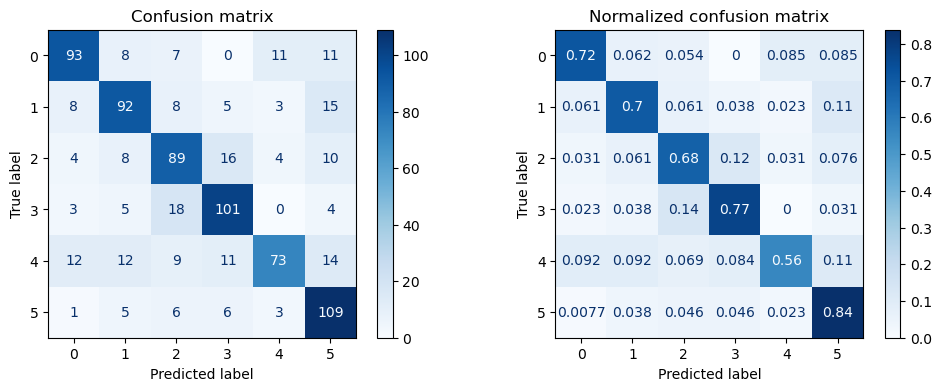

In [44]:
get_evaluation(y_test, prediction, m_nb_pipe, X_test)